Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. 
From the perspective of risk management, the result of predictive accuracy of the estimated probability of
default will be more valuable than the binary result of classification - credible or not credible clients. 
Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ 
to estimate the real probability of default. With the real probability of default as the response variable (Y),
and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX)
shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; 
its regression intercept (A) is close to zero, and regression coefficient (B) to one. 
Therefore, among the six data mining techniques, artificial neural network is the only 
one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
df=pd.read_excel("default of credit card clients.xls")

In [3]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.columns


Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
df.drop(index=0,axis=0,inplace=True)

In [8]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

In [14]:
# All the data are into the categorical data we need to convert all data into numerical because model can not understand the
# categorical feature

In [15]:
df["X1"].unique()

array([20000, 120000, 90000, 50000, 500000, 100000, 140000, 200000,
       260000, 630000, 70000, 250000, 320000, 360000, 180000, 130000,
       450000, 60000, 230000, 160000, 280000, 10000, 40000, 210000,
       150000, 380000, 310000, 400000, 80000, 290000, 340000, 300000,
       30000, 240000, 470000, 480000, 350000, 330000, 110000, 420000,
       170000, 370000, 270000, 220000, 190000, 510000, 460000, 440000,
       410000, 490000, 390000, 580000, 600000, 620000, 610000, 700000,
       670000, 680000, 430000, 550000, 540000, 1000000, 530000, 710000,
       560000, 520000, 750000, 640000, 16000, 570000, 590000, 660000,
       720000, 327680, 740000, 800000, 760000, 690000, 650000, 780000,
       730000], dtype=object)

In [16]:
df["X2"].unique()

array([2, 1], dtype=object)

In [17]:
df["X3"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=object)

In [18]:
df["X4"].unique()

array([1, 2, 3, 0], dtype=object)

In [19]:
df["X5"].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=object)

In [20]:
df["X6"].unique()

array([2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6], dtype=object)

In [21]:
df["X7"].unique()

array([2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8], dtype=object)

In [22]:
df["X8"].unique()

array([-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8], dtype=object)

In [23]:
df["X9"].unique()

array([-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8], dtype=object)

In [24]:
df["X10"].unique()

array([-2, 0, -1, 2, 3, 5, 4, 7, 8, 6], dtype=object)

In [25]:
df["X11"].unique()

array([-2, 2, 0, -1, 3, 6, 4, 7, 8, 5], dtype=object)

In [26]:
df["X12"].unique()

array([3913, 2682, 29239, ..., 1683, -1645, 47929], dtype=object)

In [27]:
df["X13"].unique()

array([3102, 1725, 14027, ..., 3356, 78379, 48905], dtype=object)

In [28]:
df["X14"].unique()

array([689, 2682, 13559, ..., 2758, 76304, 49764], dtype=object)

In [29]:
df["X15"].unique()

array([0, 3272, 14331, ..., 20878, 52774, 36535], dtype=object)

In [30]:
df["X16"].unique()

array([0, 3455, 14948, ..., 31237, 5190, 32428], dtype=object)

In [31]:
df["X17"].unique()

array([0, 3261, 15549, ..., 19357, 48944, 15313], dtype=object)

In [32]:
df["X18"].unique()

array([0, 1518, 2000, ..., 10029, 9054, 85900], dtype=object)

In [33]:
df['X19'].unique()

array([689, 1000, 1500, ..., 2977, 111784, 3526], dtype=object)

In [34]:
df["X20"].unique()

array([0, 1000, 1200, ..., 349395, 8907, 25128], dtype=object)

In [35]:
df["X21"].unique()

array([0, 1000, 1100, ..., 2556, 10115, 8049], dtype=object)

In [36]:
df["X22"].unique()

array([0, 1000, 1069, ..., 8040, 3319, 52964], dtype=object)

In [37]:
df["X23"].unique()

array([0, 2000, 5000, ..., 70052, 220076, 16080], dtype=object)

In [38]:
#we need to convert all the data into numerical for because it shows object

In [39]:
df["X1"]=df["X1"].astype(int)
df["X2"]=df["X2"].astype(int)
df["X3"]=df["X3"].astype(int)
df["X4"]=df["X4"].astype(int)
df["X5"]=df["X5"].astype(int)
df["X6"]=df["X6"].astype(int)
df["X7"]=df["X7"].astype(int)
df["X8"]=df["X8"].astype(int)
df["X9"]=df["X9"].astype(int)
df["X10"]=df["X10"].astype(int)
df["X11"]=df["X11"].astype(int)
df["X12"]=df["X12"].astype(int)
df["X13"]=df["X13"].astype(int)
df["X14"]=df["X14"].astype(int)
df["X15"]=df["X15"].astype(int)
df["X16"]=df["X16"].astype(int)
df["X17"]=df["X17"].astype(int)
df["X18"]=df["X18"].astype(int)
df["X19"]=df["X19"].astype(int)
df["X20"]=df["X20"].astype(int)
df["X21"]=df["X21"].astype(int)
df["X22"]=df["X22"].astype(int)
df["X23"]=df["X23"].astype(int)


In [40]:
df["Y"].unique()

array([1, 0], dtype=object)

In [41]:
df["Y"]=df["Y"].astype(int)

In [42]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
X2,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
X3,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
X4,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
X5,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
X6,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
X7,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
X8,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
X9,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
X10,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


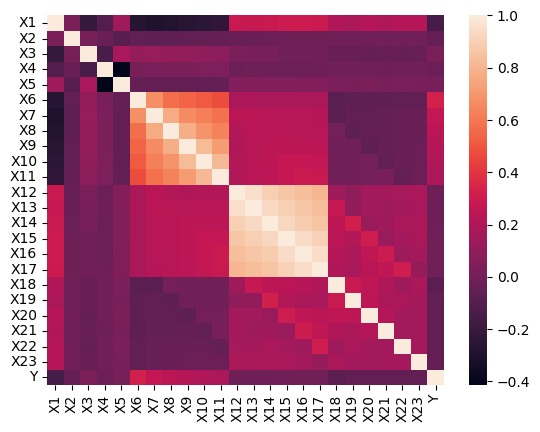

<Figure size 2000x2000 with 0 Axes>

In [43]:
sns.heatmap(df.corr())
plt.figure(figsize=(20,20))
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int32
 1   X2      30000 non-null  int32
 2   X3      30000 non-null  int32
 3   X4      30000 non-null  int32
 4   X5      30000 non-null  int32
 5   X6      30000 non-null  int32
 6   X7      30000 non-null  int32
 7   X8      30000 non-null  int32
 8   X9      30000 non-null  int32
 9   X10     30000 non-null  int32
 10  X11     30000 non-null  int32
 11  X12     30000 non-null  int32
 12  X13     30000 non-null  int32
 13  X14     30000 non-null  int32
 14  X15     30000 non-null  int32
 15  X16     30000 non-null  int32
 16  X17     30000 non-null  int32
 17  X18     30000 non-null  int32
 18  X19     30000 non-null  int32
 19  X20     30000 non-null  int32
 20  X21     30000 non-null  int32
 21  X22     30000 non-null  int32
 22  X23     30000 non-null  int32
 23  Y       300

In [45]:
X=df.drop("Y",axis=1)

In [46]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [47]:
Y=df["Y"]

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [50]:
X_train.shape

(21000, 23)

In [51]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
28466,240000,2,1,1,40,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
27623,50000,2,1,2,23,-1,-1,-1,-1,-1,...,2299,4800,9810,660,2548,2321,4800,9810,660,2980
28377,50000,2,2,1,36,2,2,2,2,0,...,49125,47956,43578,35126,0,4700,0,2004,3500,0
10918,200000,2,3,1,54,6,5,4,3,2,...,104686,102549,101400,0,0,0,0,0,0,0
27235,240000,1,1,1,35,-1,-1,-1,0,-1,...,21790,17102,13367,22659,2017,21817,1120,13434,22772,22820


In [52]:
y_train.head()

28466    1
27623    0
28377    0
10918    0
27235    0
Name: Y, dtype: int32

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [54]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [55]:
X_train

array([[ 0.56391448,  0.80648893, -1.07681763, ..., -0.30370385,
        -0.30669703, -0.29550752],
       [-0.90610925,  0.80648893, -1.07681763, ...,  0.3050678 ,
        -0.26502896, -0.12727157],
       [-0.90610925,  0.80648893,  0.18648797, ..., -0.17934316,
        -0.08573001, -0.29550752],
       ...,
       [-0.90610925, -1.23994262, -1.07681763, ..., -0.30370385,
        -0.30669703, -0.29550752],
       [-0.75136991,  0.80648893,  0.18648797, ..., -0.22923637,
        -0.30669703, -0.2277615 ],
       [-0.05504288,  0.80648893,  0.18648797, ..., -0.20131106,
         0.58979774, -0.210825  ]])

In [56]:
X_test

array([[-1.06084859, -1.23994262,  0.18648797, ..., -0.2106195 ,
        -0.21199688, -0.18259749],
       [-0.13241255,  0.80648893, -1.07681763, ..., -0.139441  ,
        -0.13819389, -0.14482908],
       [-0.75136991,  0.80648893,  1.44979356, ..., -0.15241075,
        -0.14886344, -0.15132141],
       ...,
       [-0.59663057, -1.23994262,  0.18648797, ..., -0.23469732,
        -0.23699772, -0.23097944],
       [ 0.40917514,  0.80648893,  0.18648797, ...,  0.02966224,
         0.05701469,  0.00912376],
       [ 0.64128415,  0.80648893, -1.07681763, ..., -0.03617943,
        -0.25518015,  0.22190272]])

In [57]:
model=LogisticRegression()

In [58]:
#you are training your model here
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
model.score(X_train,y_train)

0.8115238095238095

In [60]:
y_pred=model.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.8087777777777778

In [62]:
confusion_matrix(y_test,y_pred)

array([[6824,  216],
       [1505,  455]], dtype=int64)

In [63]:
# we can say that  than 80%  data are accurate. default payment next month will be 80% accurate